In [1]:
hydropathy_index = {"R":-2.5,"K":-1.5,"D":-0.9,"Q":-0.85,"N":-0.78,
                    "E":-0.74,"H":-0.4,"S":-0.18,"T":-0.05,"P":0.12,
                    "Y":0.26,"C":0.29,"G":0.48,"A":0.62,"M":0.64,
                    "W":0.81,"L":1.1,"V":1.1, "F":1.2,"I":1.4} 

occurance = {"A":8.76,"R":5.78,"N":3.93,"D":5.49,"C":1.38,
             "Q":3.9,"E":6.32,"G":7.03,"H":2.26,"I":5.49,
             "L":9.68,"K":5.19,"M":2.32,"F":3.87,"P":5.02,
             "S":7.14,"T":5.53,"W":1.25,"Y":2.91,"V":6.73} 

charge = {"A":0,"D":-1,"E":-1,"H":+0.1,"C":0,
          "Y":0,"K":+1,"R":+1,"N":0,"Q":0,
          "G":0,"I":0,"L":0,"M":0,"F":0,
          "P":0, "S":0,"T":0,"W":0,"V":0}

vloumn = {"A":88.6,"R":173.4,"N":114.1,"D":111.1,"C":108.5,
          "Q":143.8,"E":138.4,"G":60.1,"H":153.2,"I":166.7,
          "L":166.7,"K":168.6,"M":162.9,"F":189.9,"P":112.7,
          "S":89.0,"T":116.1,"W":227.8,"Y":193.6,"V":140.0}


AA_list = ["Q","W","E","R","T","Y","I","P","A","S","D","F","G","H","K","L","C","V","N","M"]


def context_independent(mutation):
    #mutation in wildnummut,
    wildtype = mutation[0]
    muttype = mutation[-1]
    mutationlist = []
    for aa in AA_list:
        if aa == wildtype:
            mutationlist.append(-1)
        elif aa == muttype:
            mutationlist.append(1)
        else:
            mutationlist.append(0)
    number = mutation[1:-1]
    V_wild = vloumn.get(wildtype)
    V_mut = vloumn.get(muttype)
    Hi_wild = hydropathy_index.get(wildtype)
    Hi_mut = hydropathy_index.get(muttype)
    C_wild = charge.get(wildtype)
    C_mut = charge.get(muttype)
    O_wild = occurance.get(wildtype)
    O_mut = occurance.get(muttype)
    context_independent_list = mutationlist+[V_wild,V_mut,Hi_wild,Hi_mut,C_wild,C_mut,O_wild,O_mut]
    return context_independent_list

In [2]:
AA_list = ["Q","W","E","R","T","Y","I","P","A","S","D","F","G","H","K","L","C","V","N","M"]


def context_independent1(mutation):
    #mutation in wildnummut,
    wildtype = mutation[0]
    muttype = mutation[-1]
    mutationlist = []
    for aa in AA_list:
        if aa == wildtype:
            mutationlist.append(-1)
        elif aa == muttype:
            mutationlist.append(1)
        else:
            mutationlist.append(0)
        


def context_independent2(mutation):
    #mutation in wildnummut,
    wildtype = mutation[0]
    muttype = mutation[-1]
    mutationlist = []
    for aa in AA_list:
        if aa == wildtype:
            mutationlist.append(-1)
        if aa == muttype:
            mutationlist.append(1)
        else:
            mutationlist.append(0)

In [3]:
import pandas as pd
import numpy as np
import string

rm_lc = str.maketrans(dict.fromkeys(string.ascii_lowercase))

ali_dict = {}


def read_a3m(a3mfilename):
    a3mfile = open(a3mfilename)
    for line in a3mfile:
        if line[0] == ">":
            head = line.strip()
            ali_dict[head] = ""
            #print(line.strip())
        else:
            line = line.translate(rm_lc).strip()
            lst = []
            for x in line:
                lst.append(x)
            ali_dict[head] = lst
            #print(lst)

In [4]:
read_a3m("g.a3m")

In [5]:
df = pd.DataFrame(ali_dict)
seq_length = df.shape[0]
seq_num = df.shape[1]
df_msa = df.T
df_msa.head()


,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
>G,M,T,Y,K,L,I,L,N,G,K,...,D,A,T,K,T,F,T,V,T,E
>UniRef100_Q53337 Protein G IgG Fc binding domain n=1 Tax=Streptococcus sp. CMCC 32138 TaxID=184480 RepID=Q53337_9STRE,T,T,Y,K,L,V,I,N,G,K,...,D,A,T,K,T,F,T,V,T,E
>UniRef100_UPI0000111373 PROTEIN G n=1 Tax=Streptococcus sp. TaxID=1306 RepID=UPI0000111373,T,T,Y,K,L,I,L,N,G,K,...,D,A,T,K,T,F,T,V,T,E
>UniRef100_UPI00001115E7 IMMUNOGLOBULIN G BINDING PROTEIN G n=1 Tax=Streptococcus sp. TaxID=1306 RepID=UPI00001115E7,T,T,F,K,L,I,I,N,G,K,...,D,A,T,K,T,W,T,V,T,E
>UniRef100_UPI0000111875 GB1-C3B4 n=1 Tax=Streptococcus sp. G148 TaxID=1324 RepID=UPI0000111875,T,T,F,K,L,I,I,N,G,K,...,D,A,T,K,T,F,T,V,T,E


In [6]:
alphabet = "ARNDCQEGHILKMFPSTWYV-"
p_mas = np.zeros([20,56])
for p in range(seq_length):
    for num,AA in enumerate(alphabet):
        if AA != "-":
            count = df_msa[p].value_counts().get(AA)
            if count == None:
                p_mas[num][p] = 0
            else:
                p_mas[num][p] = count/seq_num
                #print(num,p,count/seq_num)
    p = p + 1
        #print(num,AA)
    

In [7]:
p_mas.shape

(20, 56)

In [8]:
%matplotlib inline

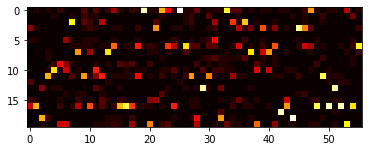

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#a = np.random.random((16, 16))
plt.imshow(p_mas, cmap='hot', interpolation='nearest')
plt.show()

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import string
import gremlin

# ==========================================================================
# PREP MSA
# ==========================================================================
# parse fasta
headers, seqs = gremlin.parse_fasta("g.a3m",a3m=True)

train_seqs, test_seqs = gremlin.split_train_test(seqs, frac_test=0.1)

# process input training sequences
msa = gremlin.mk_msa(train_seqs, gap_cutoff=0.5, eff_cutoff=0.8)
# gap_cutoff=0.5 (positions with ≥ 50% gaps are removed)
# eff_cutoff=0.8 (sequences that share ≥ 80% sequence identity 
# are considered "effectively" a single sequence)

#%%time
# ==========================================================================
# RUN GREMLIN
# ==========================================================================
mrf = gremlin.GREMLIN(msa,lam_w=0.1)

# NOTE: lam_v (for one-body term) lam_w (for two-body term) can be used to regularize the model
#
# for contact prediction we find lam_w = 0.01 to be most optimial
# (even though it's technically overfitting on the data!)
# the overfitting is partly corrected by APC
#
# for design/scoring you may want to bump the lam_w to a higher value!


/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

starting 1703.4
iter 10 1840.29
iter 20 1645.6
iter 30 1564.93
iter 40 1554.17
iter 50 1546.1
iter 60 1544.32
iter 70 1543.47
iter 80 1543.14
iter 90 1543.05
iter 100 1543.02


In [11]:
mrf["v"].T.shape

(20, 56)

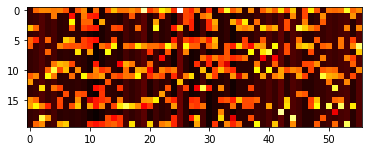

In [12]:
plt.imshow(mrf["v"].T, cmap='hot', interpolation='nearest')
plt.show()

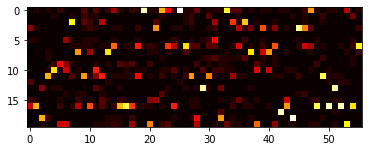

In [13]:
plt.imshow(p_mas, cmap='hot', interpolation='nearest')
plt.show()

In [14]:
# Y33L
alphabet = "ARNDCQEGHILKMFPSTWYV-"
A2N = {}
for num,AA in enumerate(alphabet):
    A2N[AA]=num

In [15]:
mutation = "Y33L"
def extract_feature(mutation):
    w_num = A2N[mutation[0]]
    m_num = A2N[mutation[-1]]
    pos = int(mutation[1:-1])

    w_mrf_v = mrf["v"].T[w_num][pos-1]
    m_mrf_v = mrf["v"].T[m_num][pos-1]
    w_P = p_mas[w_num][pos-1]
    m_P = p_mas[m_num][pos-1]
    flst = context_independent(mutation)+[w_mrf_v,m_mrf_v,w_P,m_P]
    return flst

def r_extract_feature(mutation):
    
    rmutation = mutation[-1] + mutation[1:-1] + mutation[0]
    mutation = rmutation
    
    w_num = A2N[mutation[0]]
    m_num = A2N[mutation[-1]]
    pos = int(mutation[1:-1])

    w_mrf_v = mrf["v"].T[w_num][pos-1]
    m_mrf_v = mrf["v"].T[m_num][pos-1]
    w_P = p_mas[w_num][pos-1]
    m_P = p_mas[m_num][pos-1]
    flst = context_independent(mutation)+[w_mrf_v,m_mrf_v,w_P,m_P]
    return flst

In [16]:
flst = extract_feature(mutation)
flst

[0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 193.6,
 166.7,
 0.26,
 1.1,
 0,
 0,
 2.91,
 9.68,
 3.6761007,
 3.3008015,
 0.5517241379310345,
 0.06896551724137931]

In [17]:
dataset = open('G_clean.txt')
target = []
#del data
for line in dataset:
    #print(line.strip().split())
    mutation = line.strip().split()[0]
    flst = extract_feature(mutation)
    r_flst = r_extract_feature(mutation)
    ddg = float(line.strip().split()[1])
    #flst.append(ddg)
    try:
        data = np.append(data, [flst], axis = 0)
        #data = np.append(data, [r_flst], axis = 0)
        target.append(ddg)
        #target.append(-ddg)
    except NameError:
        data = np.array([flst])
        #data = np.append(data, [r_flst], axis = 0)
        target = [ddg]
        #target.append(-ddg)
data.shape

(830, 32)

In [18]:
data.shape

(830, 32)

In [19]:
len(target)

830

In [20]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, target, test_size=0.2, random_state=5)

In [21]:
train_data.shape

(664, 32)

In [22]:
test_data.shape

(166, 32)

In [23]:
train_data

array([[ 0.        ,  0.        , -1.        , ...,  3.47341394,
         0.72413793,  0.06896552],
       [ 0.        ,  0.        ,  0.        , ...,  1.92880404,
         0.55172414,  0.03448276],
       [ 0.        ,  0.        ,  0.        , ..., -1.62112176,
         0.55172414,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -1.36807215,
         0.5862069 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -1.41986752,
         0.44827586,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.30489862,
         0.37931034,  0.03448276]])

In [24]:
len(train_targets)

664

In [25]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [26]:
train_data = np.nan_to_num(train_data, copy=True, nan=0.0, posinf=None, neginf=None)

In [27]:
train_data[0]

array([-0.14544112,  0.        , -2.50762353, -0.26314094,  0.34641249,
       -0.03767554, -0.15958414, -0.20187212,  0.10613373, -0.24637954,
        0.1458378 , -0.16289307,  2.90088683, -0.24979992,  0.15046517,
       -0.0278411 ,  0.        ,  0.04140441,  0.00867795, -0.15242624,
        0.29599172, -2.19459778, -0.7247182 ,  0.51453719, -1.63920208,
       -0.07390383,  0.2215036 ,  0.81357286,  1.67233693,  1.92304516,
        0.95544815,  0.84582378])

In [28]:
#target

In [63]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [30]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

W1224 11:39:23.698909 4625366464 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1224 11:39:23.700492 4625366464 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1224 11:39:23.703037 4625366464 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1224 11:39:23.741908 4625366464 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1224 11:39:23.885051 4625366464 deprecation_wrapper.py:119] From /usr/local

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [31]:
all_scores

[0.7473103511764343,
 0.7567511746682316,
 0.7337523210479553,
 0.7300037361053099]

In [32]:
np.mean(all_scores)

0.7419543957494827

In [33]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [34]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [35]:


average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]



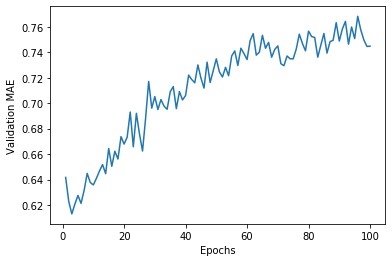

In [36]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

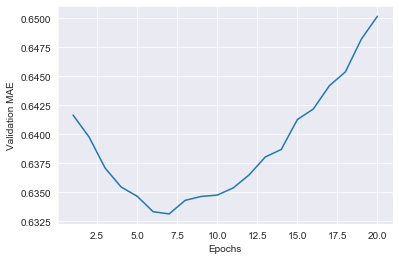

In [61]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[0:20])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [64]:
test_data = np.nan_to_num(test_data, copy=True, nan=0.0, posinf=None, neginf=None)

# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=7, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)



166/166 [==============================] - 0s 341us/step


In [65]:
test_mae_score

0.5658345078847494

In [66]:
#test_targets

In [67]:
test_mse_score

0.5490042883229543

In [68]:
pr = list(model.predict(test_data))

In [69]:
#for x in test_targets:
    #print(x)
    #for x in pr:
    #print(x[0])
    #np.corrcoef(lst_pr,test_targets)

In [70]:
lst_pr = []
for x in pr:
    lst_pr.append(float(x))
np.corrcoef(lst_pr,test_targets)

array([[1.        , 0.59946789],
       [0.59946789, 1.        ]])

In [71]:
len(test_targets)

166

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 3,169
Trainable params: 3,169
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.get_config()

{'name': 'sequential_5',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_13',
    'trainable': True,
    'batch_input_shape': (None, 32),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_14',
    'trainable': True,
    'units': 16,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros',

## ML

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [75]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, np.array(target), test_size = 0.3, random_state = 25)

In [76]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (581, 32)
Shape of X_test:  (249, 32)
Shape of y_train:  (581,)
Shape of y_test (249,)


### <span id="7"></span> ** Linear Regression **


In [77]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.3638815399405392
R2_score (train):  0.43239595374465845
R2_score (test):  0.3025847963301551
RMSE:  0.815496826803149


### <span id="8"></span> ** Polynomial Regression - 1nd degree **

In [99]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 1)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.3638815399405392
R2_score (train):  0.43241392993679595
R2_score (test):  0.30250750868825405
RMSE:  0.815542012282544


### <span id="9"></span> ** Ridge Regression **

In [81]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=3.8, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [82]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  -0.2822137222375476
R2_score (train):  0.7796037856832975
R2_score (test):  -0.2567424292207887
RMSE:  1.0947115719322924


### <span id="10"></span> ** Lasso Regression **

In [83]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Lasso(alpha=0.012, copy_X=True, fit_intercept=True,
                       max_iter=3000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [84]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.2865510267693545
R2_score (train):  0.682568173783363
R2_score (test):  0.2941993925184506
RMSE:  0.8203847599535863


### <span id="11"></span> ** Support Vector Regression **


In [85]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [86]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score the Test set results
y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE the Test set results
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  0.3698817379550456
R2_score (train):  0.6311694082035756
R2_score (test):  0.2991380129574691
RMSE:  0.817509527767656


### <span id="12"></span> ** Decision Tree Regression **

In [90]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0, max_depth=3)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [89]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 3 for the optimal model.


In [91]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.24446446986731257
R2_score (train):  0.36894670433431664
R2_score (test):  0.2877942968113597
RMSE:  0.8240988225719242


### <span id="13"></span> ** Random Forest Regression **

In [92]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [93]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.46535113020565433
R2_score (train):  0.9273341850062038
R2_score (test):  0.4987935850858659
RMSE:  0.6913291677850967


## <span id="14"></span> ** 5. Measuring the Error **

In [106]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (1nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [107]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.815497,0.432396,0.302585,0.363882
1,Polynomial Regression (1nd),0.815542,0.432414,0.302508,0.363882
2,Ridge Regression,1.094712,0.779604,-0.256742,-0.282214
3,Lasso Regression,0.820385,0.682568,0.294199,0.286551
4,Support Vector Regression,0.817510,0.631169,0.299138,0.369882
5,Decision Tree Regression,0.824099,0.368947,0.287794,0.244464
6,Random Forest Regression,0.691329,0.927334,0.498794,0.465351


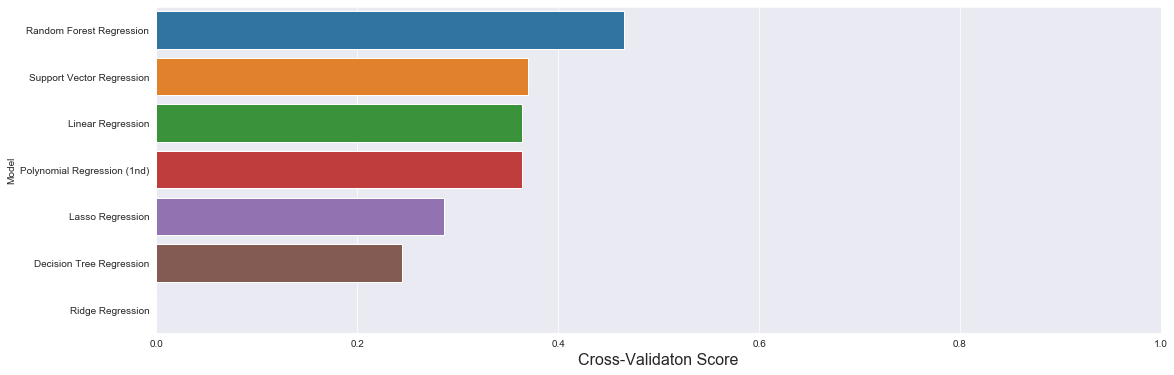

In [108]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

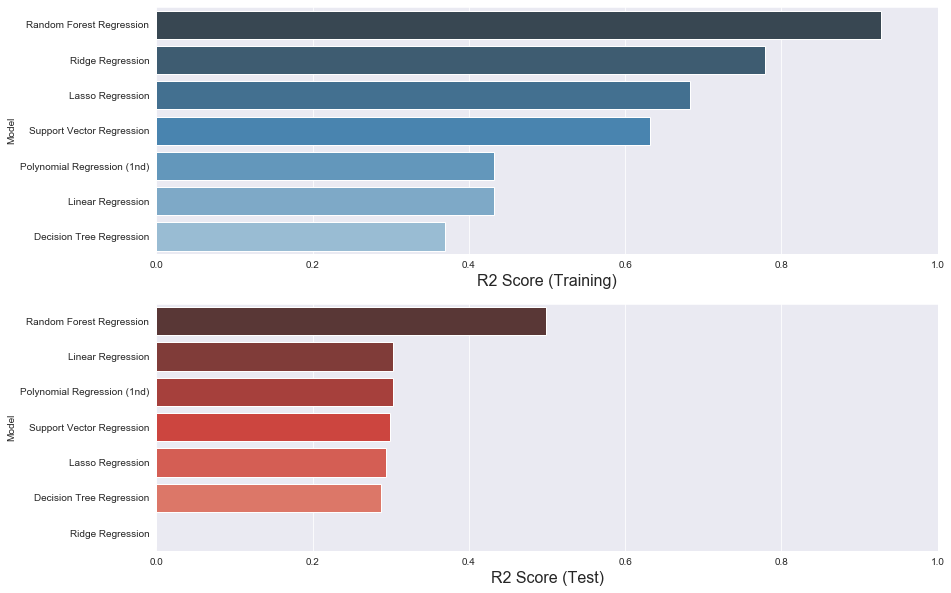

In [109]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

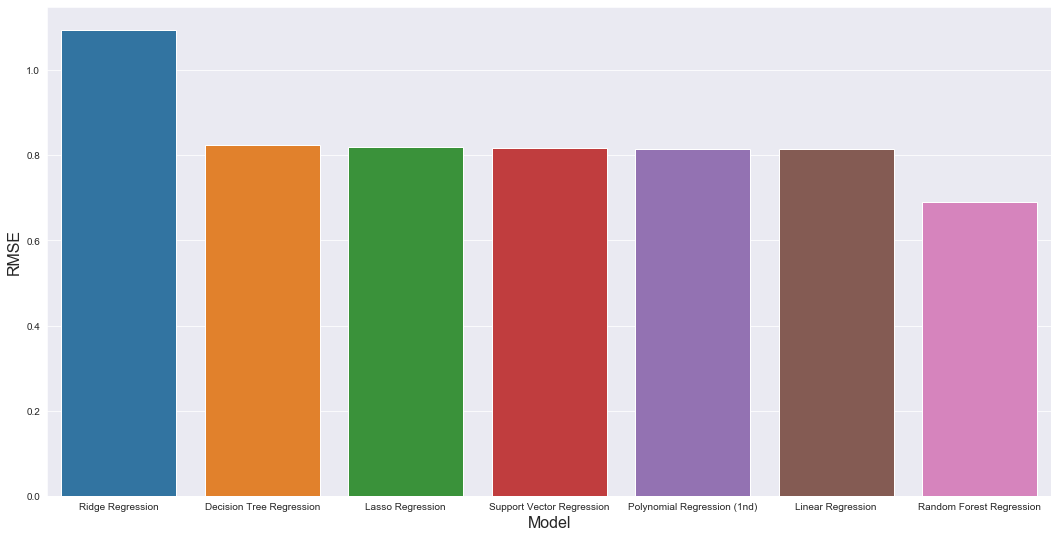

In [110]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,9))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()